# Predict survival on the Titanic

## model prediction using grid search

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
data2 = pd.read_csv("../data/total_V3.csv", index_col=0)

In [15]:
data2.apply(lambda x: sum(pd.isnull(x)))

Age                        263
Cabin                     1014
Embarked                     0
Fare                         0
Name                         0
Parch                        0
PassengerId                  0
Pclass                       0
Sex                          0
SibSp                        0
Survived                   418
Ticket                       0
Family                       0
Title                        0
ticket_words                 0
ticket_number                0
cabin_word                1014
cabin_number              1020
Age_pred                     0
ticket_words_trans           0
location_survival_rate       0
dtype: int64

In [95]:
data2.head(2)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Ticket,Family,Title,ticket_words,ticket_number,cabin_word,cabin_number,Age_pred,ticket_words_trans,location_survival_rate
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,...,A/5 21171,1,Mr,A/5,21171,NaN,NaN,2,ticket_words_3class,0.285714
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,...,PC 17599,1,Mrs,PC,17599,C,85.0,3,ticket_words_1class,0.500000


In [5]:
dump = ["Age","Cabin", "Name","Ticket", "ticket_words", 
        "ticket_number", "cabin_word", "cabin_number", "ticket_words_trans"]
data2.drop(dump,1, inplace=True)

data = data2.dropna()  # train data 

In [97]:
data.shape

(891, 12)

In [98]:
data.head()

,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Family,Title,Age_pred,location_survival_rate
0,S,7.2500,0,1,3,male,1,0.0,1,Mr,2,0.285714
1,C,71.2833,0,2,1,female,1,1.0,1,Mrs,3,0.500000
2,S,7.9250,0,3,3,female,0,1.0,0,Miss,2,0.600000
3,S,53.1000,0,4,1,female,1,1.0,1,Mrs,3,0.750000
4,S,8.0500,0,5,3,male,0,0.0,0,Mr,3,0.111111


In [7]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data.Sex = lb.fit_transform(data.Sex)
data.Embarked = lb.fit_transform(data.Embarked)
data.Title = lb.fit_transform(data.Title)

In [8]:
data.head()

,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Family,Title,Age_pred,location_survival_rate
0,2,7.2500,0,1,3,1,1,0.0,1,2,2,0.285714
1,0,71.2833,0,2,1,0,1,1.0,1,3,3,0.500000
2,2,7.9250,0,3,3,0,0,1.0,0,1,2,0.600000
3,2,53.1000,0,4,1,0,1,1.0,1,3,3,0.750000
4,2,8.0500,0,5,3,1,0,0.0,0,2,3,0.111111


### split survived and not survived for model balance

In [10]:
data_s = data[data.Survived == 1.0]
data_ns = data[data.Survived == 0.0]
x1,y1 = data_s.drop(["Survived","PassengerId"],1),data_s.Survived
x2,y2 = data_ns.drop(["Survived","PassengerId"],1),data_ns.Survived

from sklearn.cross_validation import train_test_split
# Split the dataset in two equal parts
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2,random_state = 16)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2,random_state = 16)

x_train, x_test, y_train, y_test = pd.concat([x1_train,x2_train]),pd.concat([x1_test,x2_test]),pd.concat([y1_train,y2_train]),pd.concat([y1_test,y2_test])

### build grid search function

In [26]:
def search_best_parameter_for_clf(model, tuned_parameters, cv=10):
    from sklearn.grid_search import GridSearchCV
    from sklearn.metrics import classification_report
    
    print "Enviorment:"
    print __doc__ + "\n"

    # fit model
    print "Build Grid Search Model"
    clf = GridSearchCV(model, tuned_parameters, cv=10)
    clf.fit(x_train, y_train)

    # get best parameter 
    print "Best parameters set found on:"
    print clf.best_params_
    print "Best accuracy score is:"
    print max([y for x,y,z in clf.grid_scores_])

    # get score for each parameter 
    print "Grid scores on each parameter:\n"
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std(), params))
    print ""

    # generate detailed report
    print "Detailed classification report:\n"
    y_true, y_pred = y_test, clf.predict(x_test)
    print(classification_report(y_true, y_pred))
    print '>>>> Grid Search Finished!'
    return clf

## try KNeighborsClassifier

In [82]:
from sklearn.neighbors import KNeighborsClassifier

tuned_parameters = {'n_neighbors': range(5,20), "weights":['uniform','distance'],
                    'algorithm' :['auto'],
                    'p':[1,2] ,'leaf_size':[10,30,300,500],
                    'metric':['hamming','sokalmichener','sokalsneath']}

model = KNeighborsClassifier()
search_best_parameter_for_clf(model, tuned_parameters)

Enviorment:
Automatically created module for IPython interactive environment

Build Grid Search Model
Best parameters set found on:
{'n_neighbors': 18, 'algorithm': 'auto', 'metric': 'hamming', 'p': 1, 'weights': 'distance', 'leaf_size': 10}
Best accuracy score is:
0.832865168539
Grid scores on each parameter:

0.802 (+/-0.031) for {'n_neighbors': 5, 'algorithm': 'auto', 'metric': 'hamming', 'p': 1, 'weights': 'uniform', 'leaf_size': 10}
0.796 (+/-0.030) for {'n_neighbors': 5, 'algorithm': 'auto', 'metric': 'hamming', 'p': 1, 'weights': 'distance', 'leaf_size': 10}
0.802 (+/-0.031) for {'n_neighbors': 5, 'algorithm': 'auto', 'metric': 'hamming', 'p': 2, 'weights': 'uniform', 'leaf_size': 10}
0.796 (+/-0.030) for {'n_neighbors': 5, 'algorithm': 'auto', 'metric': 'hamming', 'p': 2, 'weights': 'distance', 'leaf_size': 10}
0.801 (+/-0.046) for {'n_neighbors': 6, 'algorithm': 'auto', 'metric': 'hamming', 'p': 1, 'weights': 'uniform', 'leaf_size': 10}
0.820 (+/-0.040) for {'n_neighbors': 6, 

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'algorithm': ['auto'], 'metric': ['hamming', 'sokalmichener', 'sokalsneath'], 'p': [1, 2], 'weights': ['uniform', 'distance'], 'leaf_size': [10, 30, 300, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [83]:
# best score on the deta set
from sklearn.metrics import accuracy_score
clf = KNeighborsClassifier(n_neighbors= 18, algorithm='auto', metric= 'hamming', p= 1, 
                           weights= 'distance', leaf_size= 10).fit(x_train,y_train)
accuracy_score(clf.predict(x_test),y_test)

0.86033519553072624

## try random forest

In [84]:
from sklearn.ensemble import RandomForestClassifier
tuned_parameters = {'n_estimators': [8,10,12,15], 
                    'criterion':['gini','entropy'],
                    'max_depth': [5,7,10],
                    "min_samples_split": [2,3,4],
                    'oob_score':[True, False]}

model = RandomForestClassifier()

In [85]:
search_best_parameter_for_clf(model, tuned_parameters)

Enviorment:
Automatically created module for IPython interactive environment

Build Grid Search Model
Best parameters set found on:
{'min_samples_split': 4, 'n_estimators': 12, 'oob_score': False, 'criterion': 'entropy', 'max_depth': 7}
Best accuracy score is:
0.851123595506
Grid scores on each parameter:

0.820 (+/-0.028) for {'min_samples_split': 2, 'n_estimators': 8, 'oob_score': True, 'criterion': 'gini', 'max_depth': 5}
0.829 (+/-0.038) for {'min_samples_split': 2, 'n_estimators': 8, 'oob_score': False, 'criterion': 'gini', 'max_depth': 5}
0.826 (+/-0.040) for {'min_samples_split': 2, 'n_estimators': 10, 'oob_score': True, 'criterion': 'gini', 'max_depth': 5}
0.822 (+/-0.029) for {'min_samples_split': 2, 'n_estimators': 10, 'oob_score': False, 'criterion': 'gini', 'max_depth': 5}
0.823 (+/-0.022) for {'min_samples_split': 2, 'n_estimators': 12, 'oob_score': True, 'criterion': 'gini', 'max_depth': 5}
0.823 (+/-0.036) for {'min_samples_split': 2, 'n_estimators': 12, 'oob_score': Fal

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [8, 10, 12, 15], 'min_samples_split': [2, 3, 4], 'oob_score': [True, False], 'criterion': ['gini', 'entropy'], 'max_depth': [5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [132]:
# best score on the deta set
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(min_samples_split= 4, n_estimators=12, oob_score= False, 
                             criterion= "entropy", max_depth= 7).fit(x_train,y_train)
accuracy_score(clf.predict(x_test),y_test)

0.88268156424581001

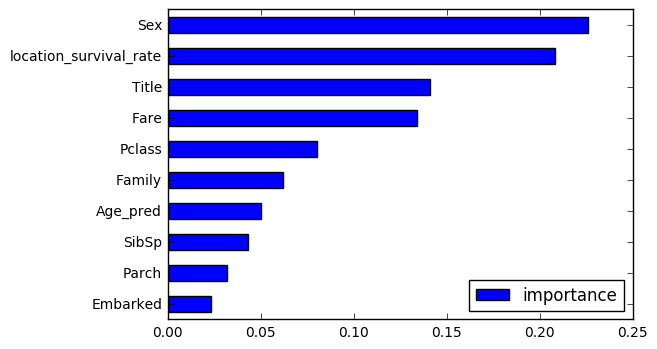

In [88]:
df = pd.DataFrame(clf.feature_importances_, index=x_train.columns, columns=['importance']).sort_values(
    by = 'importance')
df.plot.barh()

## try GBDT

In [129]:
data_s = data[data.Survived == 1.0]
data_ns = data[data.Survived == 0.0]
x1,y1 = data_s.drop(["Survived",'Parch','SibSp'],1),data_s.Survived
x2,y2 = data_ns.drop(["Survived",'Parch','SibSp'],1),data_ns.Survived

from sklearn.cross_validation import train_test_split

# Split the dataset in two equal parts
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2)

x_train, x_test, y_train, y_test = pd.concat([x1_train,x2_train]),pd.concat([x1_test,x2_test]),pd.concat([y1_train,y2_train]),pd.concat([y1_test,y2_test])

In [130]:
# Set the parameters by cross-validation
from sklearn.ensemble import GradientBoostingClassifier

In [131]:
tuned_parameters = {"loss" : ["deviance","exponential"],
                    'n_estimators': [8,10,12], 
                    'learning_rate': [0.0001, 0.001, 0.1],
                    'max_depth': [3,5,7,10,12],
                   "min_samples_split": [2,3,4],
                   "max_features":["log2"]}

model = GradientBoostingClassifier()

search_best_parameter_for_clf(model, tuned_parameters)

Enviorment:
Automatically created module for IPython interactive environment

Build Grid Search Model
Best parameters set found on:
{'loss': 'deviance', 'learning_rate': 0.1, 'n_estimators': 10, 'min_samples_split': 2, 'max_features': 'log2', 'max_depth': 10}
Best accuracy score is:
0.85393258427
Grid scores on each parameter:

0.617 (+/-0.004) for {'loss': 'deviance', 'learning_rate': 0.0001, 'n_estimators': 8, 'min_samples_split': 2, 'max_features': 'log2', 'max_depth': 3}
0.617 (+/-0.004) for {'loss': 'deviance', 'learning_rate': 0.0001, 'n_estimators': 10, 'min_samples_split': 2, 'max_features': 'log2', 'max_depth': 3}
0.617 (+/-0.004) for {'loss': 'deviance', 'learning_rate': 0.0001, 'n_estimators': 12, 'min_samples_split': 2, 'max_features': 'log2', 'max_depth': 3}
0.617 (+/-0.004) for {'loss': 'deviance', 'learning_rate': 0.0001, 'n_estimators': 8, 'min_samples_split': 3, 'max_features': 'log2', 'max_depth': 3}
0.617 (+/-0.004) for {'loss': 'deviance', 'learning_rate': 0.0001, '

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'loss': ['deviance', 'exponential'], 'learning_rate': [0.0001, 0.001, 0.1], 'n_estimators': [8, 10, 12], 'max_features': ['log2'], 'min_samples_split': [2, 3, 4], 'max_depth': [3, 5, 7, 10, 12]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [122]:
# best score on the deta set
from sklearn.metrics import accuracy_score

clf = GradientBoostingClassifier(loss='exponential', learning_rate=0.1, 
                                 n_estimators=10, min_samples_split=4, max_features= None,
                                 max_depth=7).fit(x_train,y_train)
accuracy_score(clf.predict(x_test),y_test)

0.87150837988826813

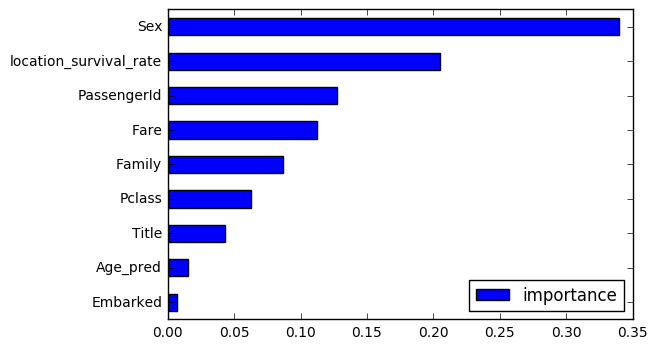

In [123]:
df = pd.DataFrame(clf.feature_importances_, index=x_train.columns, columns=['importance']).sort_values(
    by = 'importance')
df.plot.barh()

## best score on the total deta set

In [133]:
x,y = data.drop(["Survived","PassengerId"],1), data.Survived

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

clf = GradientBoostingClassifier(loss='exponential', learning_rate=0.1, 
                                 n_estimators=10, min_samples_split=4, max_features= None,
                                 max_depth=7).fit(x,y)
accuracy_score(clf.predict(x),y)

0.91470258136924809

In [134]:
# # predict model on the test set
# test = data2[pd.isnull(data2.Survived)]

# from sklearn.preprocessing import LabelEncoder
# lb = LabelEncoder()
# test.Sex = lb.fit_transform(test.Sex)
# test.Embarked = lb.fit_transform(test.Embarked)
# test.Title = lb.fit_transform(test.Title)

# x = test.drop(["Survived","PassengerId"],1)
# pred = clf.predict(x).astype(int)

# import csv
# predictions_file = open("nico_prediction_V4.csv", "wb")
# open_file_object = csv.writer(predictions_file)
# open_file_object.writerow(["PassengerId","Survived"])
# open_file_object.writerows(zip(test.PassengerId, pred))
# predictions_file.close()
# print 'Done.'